In [26]:
import pandas as pd


In [27]:
df = pd.read_csv("customer_churn_data.csv")



In [28]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [29]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [31]:
# checking for null values
df.isna().sum().sum()

np.int64(297)

In [32]:
# filling null values in "Internet Service" column
df["InternetService"] = df["InternetService"].fillna("")
df.isna().sum().sum()

np.int64(0)

In [33]:
# checking for duplicates 
df.duplicated().sum() # no duplicates

np.int64(0)

In [34]:
numeric_columns_data = df.select_dtypes(include=["number"]) # isolate number based data

numeric_columns_data.head()


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32


In [35]:
numeric_columns_data.corr() # check for correlation in number data 1-> strong correlation, 0 -> no correlation, -1 -> strong negative correlation

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [41]:
import matplotlib.pyplot as plt

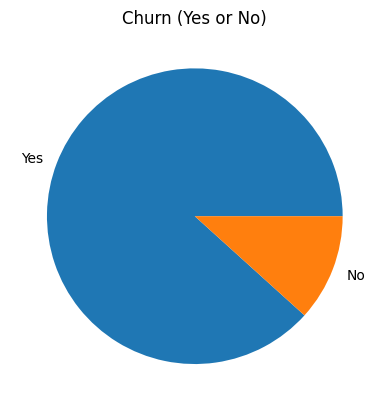

In [42]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes or No)")
plt.ylabel("")
plt.show()

In [43]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [44]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [45]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [46]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

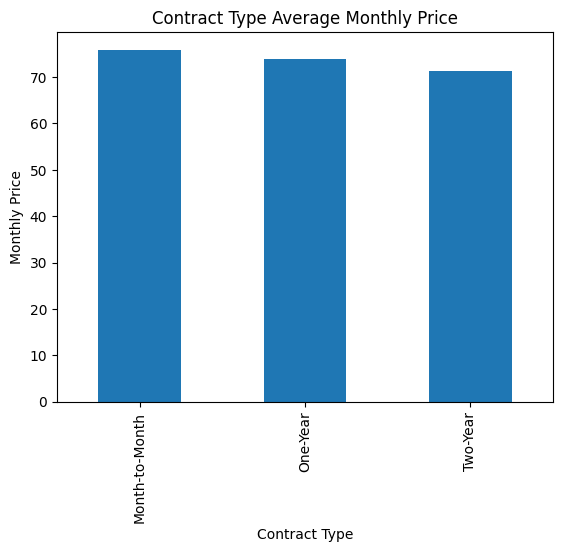

In [50]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")

plt.title("Contract Type Average Monthly Price")
plt.ylabel("Monthly Price")
plt.xlabel("Contract Type")
plt.show()

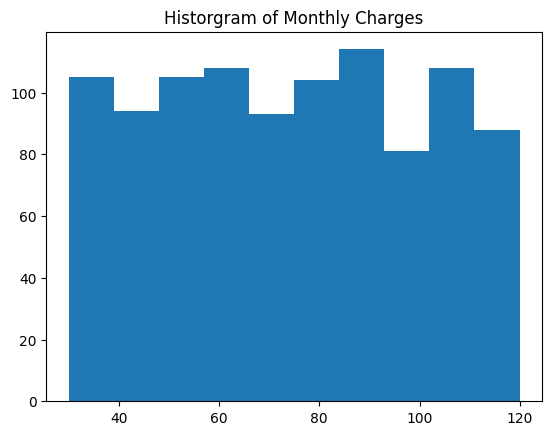

In [52]:
plt.hist(df["MonthlyCharges"])
plt.title("Historgram of Monthly Charges")
plt.show()

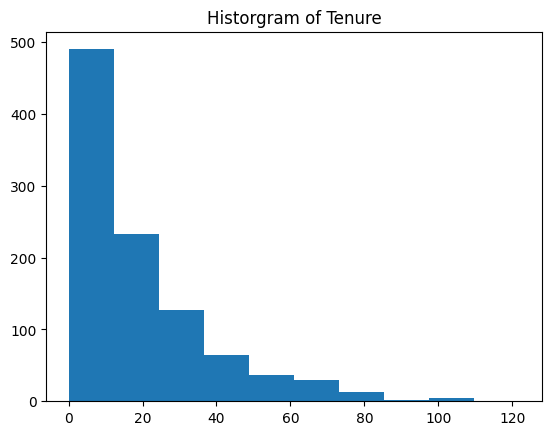

In [53]:
plt.hist(df["Tenure"])
plt.title("Historgram of Tenure")
plt.show()

In [75]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [76]:
X["Gender"]=X["Gender"].apply(lambda x: 1 if x=="Female" else 0) # 1=female, 0=male

/var/folders/gx/dl28mggn7cv_q2ccnqdxf_8c0000gn/T/ipykernel_21380/813347565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=X["Gender"].apply(lambda x: 1 if x=="Female" else 0) # 1=female, 0=male


In [77]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [78]:
type(X["Gender"][0])

numpy.int64

In [80]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0) # 1=Yes, 0=No

/var/folders/gx/dl28mggn7cv_q2ccnqdxf_8c0000gn/T/ipykernel_21380/620083056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0) # 1=Yes, 0=No


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
X_train = scaler.fit_transform(X_train)

In [94]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [95]:
X_test = scaler.fit_transform(X_test)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
def modelPerformance(predictions):
    print("accuracy score on model is {}".format(accuracy_score(y_test, predictions)))
    

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [105]:
log_model = LogisticRegression()

In [106]:
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [110]:
y_pred = log_model.predict(X_test)

In [111]:
modelPerformance(y_pred)

accuracy score on model is 0.87


In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
param_grid= {
    "n_neighbors" : [3, 5, 7, 9],
    "weights" : ["uniform", "distance"]

}

In [114]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [115]:
gridkn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [116]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [117]:
y_pred = gridkn.predict(X_test)

In [118]:
modelPerformance(y_pred)

accuracy score on model is 0.86


In [119]:
from sklearn.svm import SVC

In [120]:
svm = SVC()

In [125]:
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ["linear", "rbf", "poly"]

}

In [126]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)


In [127]:
gridsvc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [128]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [133]:
y_pred = gridsvc.predict(X_test)

In [ ]:
modelPerformance(y_pred) # best performance

accuracy score on model is 0.885


In [135]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [142]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [144]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [145]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [146]:
y_pred = grid_tree.predict(X_test)

In [147]:
modelPerformance(y_pred)

accuracy score on model is 0.815


In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [154]:
param_grid =  {
    "n_estimators" : [32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap": [True, False]

}

In [155]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [156]:
grid_rfc.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,64


In [157]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [159]:
y_predict = grid_rfc.predict(X_test)

In [160]:
modelPerformance(y_predict)

accuracy score on model is 0.855
